# Text Classification with SVM (Traditional ML Model)

This notebook implements **Support Vector Machine (SVM)** for text classification using three different embedding techniques:
- **TF-IDF**
- **Skip-gram (Word2Vec)**
- **CBOW (Word2Vec)**

## Dataset
- **Text Column**: Product Title
- **Label Column**: Cluster Label

In [ ]:
# Download NLTK punkt_tab (REQUIRED - Run this cell first!)
import nltk
import os

print("Downloading required NLTK data...")
print("This may take a minute...")

# Download punkt_tab (required for newer NLTK)
try:
    nltk.download('punkt_tab', quiet=False)
    print("✓ punkt_tab downloaded")
except Exception as e:
    print(f"Note: {e}")
    # Try punkt as fallback
    try:
        nltk.download('punkt', quiet=False)
        print("✓ punkt downloaded (fallback)")
    except:
        pass

# Download stopwords
try:
    nltk.download('stopwords', quiet=False)
    print("✓ stopwords downloaded")
except:
    pass

# Download wordnet
try:
    nltk.download('wordnet', quiet=False)
    print("✓ wordnet downloaded")
except:
    pass

print("✓ NLTK data download complete!")
print("\nNow restart the kernel (Kernel → Restart) and run the next cells.")

This may take a minute...
✓ punkt_tab downloaded
✓ stopwords downloaded
✓ wordnet downloaded
✓ NLTK data download complete!

Now restart the kernel (Kernel → Restart) and run the next cells.


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\awini\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\awini\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\awini\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# INSTALLATION INSTRUCTIONS
# =========================
# Option 1: Install via terminal (RECOMMENDED - Faster and more reliable)
# Open terminal/PowerShell and run:
#   pip install pandas numpy scikit-learn nltk gensim matplotlib seaborn
#
# Option 2: Install here (may be slow)
# Uncomment the code below and run this cell

"""
import subprocess
import sys

packages_to_install = ['nltk', 'gensim']  # Install only missing ones

for package in packages_to_install:
    try:
        __import__(package)
        print(f"✓ {package} is already installed")
    except ImportError:
        print(f"Installing {package}... This may take a few minutes...")
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package], 
                                timeout=300)  # 5 minute timeout
            print(f"✓ {package} installed successfully")
        except Exception as e:
            print(f"✗ Error installing {package}: {e}")
            print(f"Please install manually: pip install {package}")

# Download NLTK data
try:
    import nltk
    print("\nDownloading NLTK data...")
    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)
    print("✓ NLTK data downloaded")
except Exception as e:
    print(f"NLTK data download error: {e}")
    print("Run manually: import nltk; nltk.download('punkt'); nltk.download('stopwords'); nltk.download('wordnet')")
"""

print("="*60)
print("INSTALLATION INSTRUCTIONS")
print("="*60)
print("\nPlease install packages using ONE of these methods:\n")
print("METHOD 1 (Terminal - RECOMMENDED):")
print("  Open PowerShell/Terminal and run:")
print("  pip install pandas numpy scikit-learn nltk gensim matplotlib seaborn\n")
print("METHOD 2 (In Notebook):")
print("  Uncomment the code above and run this cell\n")
print("After installation, restart kernel and run the next cell.")
print("="*60)

INSTALLATION INSTRUCTIONS

Please install packages using ONE of these methods:

METHOD 1 (Terminal - RECOMMENDED):
  Open PowerShell/Terminal and run:
  pip install pandas numpy scikit-learn nltk gensim matplotlib seaborn

METHOD 2 (In Notebook):
  Uncomment the code above and run this cell

After installation, restart kernel and run the next cell.


In [3]:
# Import required libraries
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.model_selection import train_test_split, GridSearchCV
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    from sklearn.metrics import classification_report, confusion_matrix
    from sklearn.preprocessing import LabelEncoder
    import warnings
    warnings.filterwarnings('ignore')
    print("✓ Standard libraries imported")
except ImportError as e:
    print(f"✗ Error importing standard libraries: {e}")
    print("Please install: pip install pandas numpy scikit-learn matplotlib seaborn")
    raise

# Download NLTK data if needed
try:
    import nltk
    try:
        # Try punkt_tab first (newer NLTK versions)
        nltk.data.find('tokenizers/punkt_tab')
        print("✓ NLTK punkt_tab found")
    except LookupError:
        try:
            # Fallback to punkt (older versions)
            nltk.data.find('tokenizers/punkt')
            print("✓ NLTK punkt found")
        except LookupError:
            print("Downloading NLTK punkt data...")
            try:
                nltk.download('punkt_tab', quiet=True)
                print("✓ punkt_tab downloaded")
            except:
                nltk.download('punkt', quiet=True)
                print("✓ punkt downloaded")
    
    try:
        nltk.data.find('corpora/stopwords')
        nltk.data.find('corpora/wordnet')
        print("✓ NLTK stopwords and wordnet found")
    except LookupError:
        print("Downloading NLTK stopwords and wordnet...")
        nltk.download('stopwords', quiet=True)
        nltk.download('wordnet', quiet=True)
        print("✓ NLTK data downloaded")
        
except ImportError:
    print("✗ NLTK not installed. Please run: pip install nltk")
    raise

# Import our custom modules
import sys
import os
sys.path.append('.')

# Check if custom modules exist
if not os.path.exists('utils/preprocessing.py'):
    raise FileNotFoundError(
        "utils/preprocessing.py not found.\n"
        "Make sure you're running this notebook from the project root directory."
    )

try:
    from utils.preprocessing import TextPreprocessor
    from embeddings.tfidf_embedding import TFIDFEmbedding
    from embeddings.skipgram_embedding import SkipGramEmbedding
    from embeddings.cbow_embedding import CBOWEmbedding
    print("✓ Custom modules imported")
except ImportError as e:
    error_msg = str(e)
    print(f"✗ Error importing custom modules: {e}")
    
    # Check for specific missing dependencies
    if 'gensim' in error_msg.lower():
        print("\n" + "="*60)
        print("MISSING DEPENDENCY: gensim")
        print("="*60)
        print("Please install gensim by running this in terminal:")
        print("  pip install --user gensim")
        print("Or:")
        print("  python -m pip install --user gensim")
        print("\nAfter installation, restart kernel and run this cell again.")
        print("="*60)
    elif 'nltk' in error_msg.lower():
        print("\n" + "="*60)
        print("MISSING DEPENDENCY: nltk")
        print("="*60)
        print("Please install nltk by running this in terminal:")
        print("  pip install --user nltk")
        print("\nAfter installation, restart kernel and run this cell again.")
        print("="*60)
    else:
        print("\nMake sure all files are in the correct directories:")
        print("  - utils/preprocessing.py")
        print("  - embeddings/tfidf_embedding.py")
        print("  - embeddings/skipgram_embedding.py")
        print("  - embeddings/cbow_embedding.py")
    
    raise

print("\n" + "="*60)
print("✓ All libraries imported successfully!")
print("="*60)

✓ Standard libraries imported
✓ NLTK punkt_tab found
✓ NLTK data downloaded
✓ Custom modules imported

✓ All libraries imported successfully!


## 1. Load and Explore Dataset

In [4]:
# Load dataset
df = pd.read_csv('data/pricerunner_aggregate.csv')

# Strip whitespace from column names (CSV has leading spaces)
df.columns = df.columns.str.strip()

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (35311, 7)

Columns: ['Product ID', 'Product Title', 'Merchant ID', 'Cluster ID', 'Cluster Label', 'Category ID', 'Category Label']

First few rows:


,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


In [ ]:
# Speed: True = faster run. False = full data & grid (~hours)
FAST_MODE = True
# Fewer classes = more samples per class = often better accuracy (try 100–150)
MAX_CLASSES = 150
MAX_TRAIN_SAMPLES = 10000

# Check label distribution
text_col = 'Product Title'
label_col = 'Cluster Label'

print(f"Text column: {text_col}")
print(f"Label column: {label_col}")
print(f"\nNumber of unique labels: {df[label_col].nunique()}")
print(f"\nLabel distribution:")
print(df[label_col].value_counts().head(10))

# Check for missing values
print(f"\nMissing values in text column: {df[text_col].isna().sum()}")
print(f"Missing values in label column: {df[label_col].isna().sum()}")

Text column: Product Title
Label column: Cluster Label

Number of unique labels: 12849

Label distribution:
Cluster Label
Canon IXUS 185              27
Samsung UE49NU7100          24
Canon PowerShot SX730 HS    24
Samsung UE65NU7100          23
Samsung UE75NU7100          23
Apple iPhone 8 Plus 64GB    23
Canon IXUS 285 HS           23
Apple iPhone 7 Plus 32GB    22
Apple iPhone 7 32GB         22
Apple iPhone 8 64GB         22
Name: count, dtype: int64

Missing values in text column: 0
Missing values in label column: 0


## 2. Data Preprocessing

In [6]:
# Remove rows with missing values
df_clean = df[[text_col, label_col]].dropna()
print(f"Dataset after removing missing values: {df_clean.shape}")

# Initialize preprocessor
preprocessor = TextPreprocessor()

# Preprocess texts for TF-IDF (string format)
print("\nPreprocessing texts for TF-IDF...")
texts_tfidf = [preprocessor.preprocess_for_tfidf(text) for text in df_clean[text_col]]
print(f"Sample preprocessed text (TF-IDF): {texts_tfidf[0][:100]}...")

# Preprocess texts for embeddings (tokenized format)
print("\nPreprocessing texts for embeddings...")
texts_tokenized = [preprocessor.preprocess_for_embeddings(text) for text in df_clean[text_col]]
print(f"Sample preprocessed text (tokens): {texts_tokenized[0][:10]}...")

Dataset after removing missing values: (35311, 2)

Preprocessing texts for TF-IDF...
Sample preprocessed text (TF-IDF): apple iphone plus gb silver...

Preprocessing texts for embeddings...
Sample preprocessed text (tokens): ['apple', 'iphone', 'plus', 'gb', 'silver']...


## 3. Prepare Embeddings (Save for Team Members)

In [7]:
# Create embeddings directory if it doesn't exist
import os
os.makedirs('embeddings/saved', exist_ok=True)

# Slightly smaller/faster in FAST_MODE
max_feat = 5000 if FAST_MODE else 10000
w2v_epochs = 5 if FAST_MODE else 10
tfidf_emb = TFIDFEmbedding(max_features=max_feat, ngram_range=(1, 2))
skipgram_emb = SkipGramEmbedding(vector_size=300, window=5, min_count=2, epochs=w2v_epochs)
cbow_emb = CBOWEmbedding(vector_size=300, window=5, min_count=2, epochs=w2v_epochs)

# Fit embeddings on training data (we'll split later, but fit on all data for consistency)
print("Fitting TF-IDF...")
tfidf_emb.fit(texts_tfidf)

print("\nFitting Skip-gram...")
skipgram_emb.fit(texts_tokenized)

print("\nFitting CBOW...")
cbow_emb.fit(texts_tokenized)

# Save embeddings for team members to reuse
print("\nSaving embeddings...")
tfidf_emb.save('embeddings/saved/tfidf_model.pkl')
skipgram_emb.save('embeddings/saved/skipgram_model.bin')
cbow_emb.save('embeddings/saved/cbow_model.bin')

print("\nAll embeddings saved! Team members can load them using:")
print("  tfidf_emb.load('embeddings/saved/tfidf_model.pkl')")
print("  skipgram_emb.load('embeddings/saved/skipgram_model.bin')")
print("  cbow_emb.load('embeddings/saved/cbow_model.bin')")

Fitting TF-IDF...
TF-IDF fitted on 35311 documents
Vocabulary size: 5000

Fitting Skip-gram...
Training Skip-gram Word2Vec model...
Skip-gram model trained. Vocabulary size: 6006

Fitting CBOW...
Training CBOW Word2Vec model...
CBOW model trained. Vocabulary size: 6006

Saving embeddings...
TF-IDF model saved to embeddings/saved/tfidf_model.pkl
Skip-gram model saved to embeddings/saved/skipgram_model.bin
CBOW model saved to embeddings/saved/cbow_model.bin

All embeddings saved! Team members can load them using:
  tfidf_emb.load('embeddings/saved/tfidf_model.pkl')
  skipgram_emb.load('embeddings/saved/skipgram_model.bin')
  cbow_emb.load('embeddings/saved/cbow_model.bin')


## 4. Prepare Data Splits

In [8]:
# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_clean[label_col])

# Check class distribution
from collections import Counter
class_counts = Counter(y)
print(f"Total classes: {len(class_counts)}")
print(f"Total samples: {len(y)}")
print(f"\nClasses with < 2 samples: {sum(1 for count in class_counts.values() if count < 2)}")
print(f"Classes with < 3 samples: {sum(1 for count in class_counts.values() if count < 3)}")

# Filter out classes with too few samples (need at least 2 for stratified split)
min_samples_per_class = 2
valid_indices = [i for i, label in enumerate(y) if class_counts[label] >= min_samples_per_class]

if len(valid_indices) < len(y):
    print(f"\n⚠ Filtering out {len(y) - len(valid_indices)} samples from rare classes (< {min_samples_per_class} samples)")
    print(f"Remaining samples: {len(valid_indices)}")
    
    # Verify indices are valid before filtering
    max_valid_idx = min(len(texts_tfidf), len(texts_tokenized), len(y))
    valid_indices = [i for i in valid_indices if i < max_valid_idx]
    print(f"  Valid indices after range check: {len(valid_indices)}")
    
    # Filter data
    texts_tfidf = [texts_tfidf[i] for i in valid_indices]
    texts_tokenized = [texts_tokenized[i] for i in valid_indices]
    y = [y[i] for i in valid_indices]
    
    # Re-encode labels to be consecutive
    y = label_encoder.fit_transform(y)

# Split data: 70% train, 15% validation, 15% test
# Use stratify only if all classes have enough samples
test_size = 0.15
class_counts_after = Counter(y)
num_classes = len(class_counts_after)
min_class_count = min(class_counts_after.values())
total_samples = len(y)
min_test_samples = int(test_size * total_samples)

# Check if we can use stratified splitting
# Requirements: test_size * total_samples >= num_classes AND min_class_count >= 2
can_stratify = (min_test_samples >= num_classes) and (min_class_count >= 2)

if can_stratify:
    # Can use stratified split
    print(f"\n✓ Using stratified split")
    X_temp, X_test, y_temp, y_test = train_test_split(
        range(len(texts_tfidf)), y, test_size=test_size, random_state=42, stratify=y
    )
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=0.15/0.85, random_state=42, stratify=y_temp
    )
else:
    # Use non-stratified split when too many classes or too few samples
    print(f"\n⚠ Using non-stratified split")
    if min_test_samples < num_classes:
        print(f"  Reason: test_size * samples ({min_test_samples}) < num_classes ({num_classes})")
    if min_class_count < 2:
        print(f"  Reason: min class count ({min_class_count}) < 2")
    X_temp, X_test, y_temp, y_test = train_test_split(
        range(len(texts_tfidf)), y, test_size=test_size, random_state=42, stratify=None
    )
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=0.15/0.85, random_state=42, stratify=None
    )

print(f"\nTrain set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Test set: {len(X_test)} samples")

# Get actual texts for each split
texts_tfidf_train = [texts_tfidf[i] for i in X_train]
texts_tfidf_val = [texts_tfidf[i] for i in X_val]
texts_tfidf_test = [texts_tfidf[i] for i in X_test]

texts_tokenized_train = [texts_tokenized[i] for i in X_train]
texts_tokenized_val = [texts_tokenized[i] for i in X_val]
texts_tokenized_test = [texts_tokenized[i] for i in X_test]

# FAST_MODE: keep only top MAX_CLASSES and optionally cap train size
if FAST_MODE and MAX_CLASSES is not None:
    cnt = Counter(y_train)
    top_classes = [c for c, _ in cnt.most_common(MAX_CLASSES)]
    top_set = set(top_classes)
    keep_train = [i for i in range(len(y_train)) if y_train[i] in top_set]
    keep_val = [i for i in range(len(y_val)) if y_val[i] in top_set]
    keep_test = [i for i in range(len(y_test)) if y_test[i] in top_set]
    if MAX_TRAIN_SAMPLES and len(keep_train) > MAX_TRAIN_SAMPLES:
        import random
        random.seed(42)
        keep_train = random.sample(keep_train, MAX_TRAIN_SAMPLES)
    X_train = [X_train[i] for i in keep_train]
    y_train = np.array([y_train[i] for i in keep_train])
    X_val = [X_val[i] for i in keep_val]
    y_val = np.array([y_val[i] for i in keep_val])
    X_test = [X_test[i] for i in keep_test]
    y_test = np.array([y_test[i] for i in keep_test])
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_val = label_encoder.transform(y_val)
    y_test = label_encoder.transform(y_test)
    texts_tfidf_train = [texts_tfidf_train[i] for i in keep_train]
    texts_tfidf_val = [texts_tfidf_val[i] for i in keep_val]
    texts_tfidf_test = [texts_tfidf_test[i] for i in keep_test]
    texts_tokenized_train = [texts_tokenized_train[i] for i in keep_train]
    texts_tokenized_val = [texts_tokenized_val[i] for i in keep_val]
    texts_tokenized_test = [texts_tokenized_test[i] for i in keep_test]
    print(f"FAST_MODE: Train {len(y_train)}, Val {len(y_val)}, Test {len(y_test)}, Classes {len(np.unique(y_train))}")



Total classes: 12849
Total samples: 35311

Classes with < 2 samples: 5009
Classes with < 3 samples: 7728

⚠ Filtering out 5009 samples from rare classes (< 2 samples)
Remaining samples: 30302
  Valid indices after range check: 30302

⚠ Using non-stratified split
  Reason: test_size * samples (4545) < num_classes (7840)

Train set: 21210 samples
Validation set: 4546 samples
Test set: 4546 samples
FAST_MODE: Train 2963, Val 463, Test 442, Classes 300


## 5. Transform Data with Embeddings

In [9]:
# Transform data with TF-IDF
print("Transforming data with TF-IDF...")
X_train_tfidf = tfidf_emb.transform(texts_tfidf_train)
X_val_tfidf = tfidf_emb.transform(texts_tfidf_val)
X_test_tfidf = tfidf_emb.transform(texts_tfidf_test)
print(f"TF-IDF shape: {X_train_tfidf.shape}")

# Transform data with Skip-gram
print("\nTransforming data with Skip-gram...")
X_train_skipgram = skipgram_emb.transform(texts_tokenized_train)
X_val_skipgram = skipgram_emb.transform(texts_tokenized_val)
X_test_skipgram = skipgram_emb.transform(texts_tokenized_test)
print(f"Skip-gram shape: {X_train_skipgram.shape}")

# Transform data with CBOW
print("\nTransforming data with CBOW...")
X_train_cbow = cbow_emb.transform(texts_tokenized_train)
X_val_cbow = cbow_emb.transform(texts_tokenized_val)
X_test_cbow = cbow_emb.transform(texts_tokenized_test)
print(f"CBOW shape: {X_train_cbow.shape}")

Transforming data with TF-IDF...
TF-IDF shape: (2963, 5000)

Transforming data with Skip-gram...
Skip-gram shape: (2963, 300)

Transforming data with CBOW...
CBOW shape: (2963, 300)


## 6. Baseline SVM Models (Default Parameters)

First, we'll train baseline SVM models with default parameters to establish a baseline performance before hyperparameter tuning.

In [10]:
# Train baseline SVM models with default parameters
print("Training Baseline SVM Models (Default Parameters)")

# Baseline SVM with default parameters (probability=False for faster training)
baseline_svm = SVC(random_state=42, probability=False)

# Train baseline models for each embedding
print("\nTraining baseline SVM with TF-IDF...")
baseline_svm_tfidf = SVC(random_state=42, probability=False)
baseline_svm_tfidf.fit(X_train_tfidf, y_train)
y_val_pred_baseline_tfidf = baseline_svm_tfidf.predict(X_val_tfidf)
print(f"Baseline TF-IDF - Validation Accuracy: {accuracy_score(y_val, y_val_pred_baseline_tfidf):.4f}")
print(f"Baseline TF-IDF - Validation F1-Score: {f1_score(y_val, y_val_pred_baseline_tfidf, average='macro'):.4f}")

print("\nTraining baseline SVM with Skip-gram...")
baseline_svm_skipgram = SVC(random_state=42, probability=False)
baseline_svm_skipgram.fit(X_train_skipgram, y_train)
y_val_pred_baseline_skipgram = baseline_svm_skipgram.predict(X_val_skipgram)
print(f"Baseline Skip-gram - Validation Accuracy: {accuracy_score(y_val, y_val_pred_baseline_skipgram):.4f}")
print(f"Baseline Skip-gram - Validation F1-Score: {f1_score(y_val, y_val_pred_baseline_skipgram, average='macro'):.4f}")

print("\nTraining baseline SVM with CBOW...")
baseline_svm_cbow = SVC(random_state=42, probability=False)
baseline_svm_cbow.fit(X_train_cbow, y_train)
y_val_pred_baseline_cbow = baseline_svm_cbow.predict(X_val_cbow)
print(f"Baseline CBOW - Validation Accuracy: {accuracy_score(y_val, y_val_pred_baseline_cbow):.4f}")
print(f"Baseline CBOW - Validation F1-Score: {f1_score(y_val, y_val_pred_baseline_cbow, average='macro'):.4f}")

Training Baseline SVM Models (Default Parameters)

Training baseline SVM with TF-IDF...
Baseline TF-IDF - Validation Accuracy: 0.3996
Baseline TF-IDF - Validation F1-Score: 0.3637

Training baseline SVM with Skip-gram...
Baseline Skip-gram - Validation Accuracy: 0.1188
Baseline Skip-gram - Validation F1-Score: 0.0663

Training baseline SVM with CBOW...
Baseline CBOW - Validation Accuracy: 0.0691
Baseline CBOW - Validation F1-Score: 0.0278


## 7. Hyperparameter Tuning

Now we'll perform comprehensive hyperparameter tuning using GridSearchCV with an expanded parameter grid.

In [11]:
# Comprehensive hyperparameter grid for SVM (smaller grid in FAST_MODE)
if FAST_MODE:
    # Minimal grid: 1 setting only = 2 CV fits per embedding (very fast)
    svm_param_grid = {'C': [1.0], 'kernel': ['linear'], 'class_weight': ['balanced']}
    grid_cv_folds, use_probability = 2, False
else:
    svm_param_grid = {
        'C': [0.01, 0.1, 1.0, 10.0, 100.0],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
        'degree': [2, 3, 4],
        'coef0': [0.0, 0.1, 1.0],
        'class_weight': [None, 'balanced']
    }
    grid_cv_folds, use_probability = 3, True

# Note: Some parameters are kernel-specific:
# - 'degree' and 'coef0' only affect 'poly' and 'sigmoid' kernels
# - 'gamma' only affects 'rbf', 'poly', and 'sigmoid' kernels
# GridSearchCV will automatically handle invalid combinations

print("Comprehensive SVM Hyperparameter Grid:")
for key, value in svm_param_grid.items():
    print(f"  {key}: {value}")

# Calculate total combinations (approximate)
total_combinations = 1
for k, v in svm_param_grid.items():
    total_combinations *= len(v)
print(f"\nApproximate total combinations: {total_combinations}")
print("Note: GridSearchCV will skip invalid parameter combinations automatically")

Comprehensive SVM Hyperparameter Grid:
  C: [1.0]
  kernel: ['linear']
  class_weight: ['balanced']

Approximate total combinations: 1
Note: GridSearchCV will skip invalid parameter combinations automatically


### 7.1 SVM with TF-IDF (Hyperparameter Tuning)

In [12]:
print("Training SVM with TF-IDF embeddings")

# Grid search with cross-validation
# Note: This may take a while due to comprehensive parameter grid
# You can reduce cv folds or parameter grid size for faster training
svm_tfidf = GridSearchCV(
    SVC(random_state=42, probability=use_probability),
    param_grid=svm_param_grid,
    cv=grid_cv_folds,
    scoring='f1_macro',
    n_jobs=-1,  # Use all available cores
    verbose=2,  # Show progress
    refit=True  # Refit best model on full training data
)

svm_tfidf.fit(X_train_tfidf, y_train)

print(f"\nBest parameters: {svm_tfidf.best_params_}")
print(f"Best CV score: {svm_tfidf.best_score_:.4f}")

# Compare with baseline
baseline_f1 = f1_score(y_val, y_val_pred_baseline_tfidf, average='macro')
print(f"\nBaseline F1-Score: {baseline_f1:.4f}")
print(f"Improvement: {svm_tfidf.best_score_ - baseline_f1:.4f}")

# Evaluate on validation set
y_val_pred_tfidf = svm_tfidf.predict(X_val_tfidf)
print(f"\nValidation Accuracy: {accuracy_score(y_val, y_val_pred_tfidf):.4f}")
print(f"Validation F1-Score: {f1_score(y_val, y_val_pred_tfidf, average='macro'):.4f}")

Training SVM with TF-IDF embeddings
Fitting 2 folds for each of 1 candidates, totalling 2 fits

Best parameters: {'C': 1.0, 'class_weight': 'balanced', 'kernel': 'linear'}
Best CV score: 0.4680

Baseline F1-Score: 0.3637
Improvement: 0.1043

Validation Accuracy: 0.4039
Validation F1-Score: 0.3783


### 7.2 SVM with Skip-gram (Hyperparameter Tuning)

In [13]:
print("Training SVM with Skip-gram embeddings")

svm_skipgram = GridSearchCV(
    SVC(random_state=42, probability=use_probability),
    param_grid=svm_param_grid,
    cv=grid_cv_folds,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=2,
    refit=True
)

svm_skipgram.fit(X_train_skipgram, y_train)

print(f"\nBest parameters: {svm_skipgram.best_params_}")
print(f"Best CV score: {svm_skipgram.best_score_:.4f}")

# Compare with baseline
baseline_f1 = f1_score(y_val, y_val_pred_baseline_skipgram, average='macro')
print(f"\nBaseline F1-Score: {baseline_f1:.4f}")
print(f"Improvement: {svm_skipgram.best_score_ - baseline_f1:.4f}")

# Evaluate on validation set
y_val_pred_skipgram = svm_skipgram.predict(X_val_skipgram)
print(f"\nValidation Accuracy: {accuracy_score(y_val, y_val_pred_skipgram):.4f}")
print(f"Validation F1-Score: {f1_score(y_val, y_val_pred_skipgram, average='macro'):.4f}")

Training SVM with Skip-gram embeddings
Fitting 2 folds for each of 1 candidates, totalling 2 fits

Best parameters: {'C': 1.0, 'class_weight': 'balanced', 'kernel': 'linear'}
Best CV score: 0.2246

Baseline F1-Score: 0.0663
Improvement: 0.1583

Validation Accuracy: 0.2484
Validation F1-Score: 0.2128


### 7.3 SVM with CBOW (Hyperparameter Tuning)

In [14]:
print("Training SVM with CBOW embeddings")

svm_cbow = GridSearchCV(
    SVC(random_state=42, probability=use_probability),
    param_grid=svm_param_grid,
    cv=grid_cv_folds,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=2,
    refit=True
)

svm_cbow.fit(X_train_cbow, y_train)

print(f"\nBest parameters: {svm_cbow.best_params_}")
print(f"Best CV score: {svm_cbow.best_score_:.4f}")

# Compare with baseline
baseline_f1 = f1_score(y_val, y_val_pred_baseline_cbow, average='macro')
print(f"\nBaseline F1-Score: {baseline_f1:.4f}")
print(f"Improvement: {svm_cbow.best_score_ - baseline_f1:.4f}")

# Evaluate on validation set
y_val_pred_cbow = svm_cbow.predict(X_val_cbow)
print(f"\nValidation Accuracy: {accuracy_score(y_val, y_val_pred_cbow):.4f}")
print(f"Validation F1-Score: {f1_score(y_val, y_val_pred_cbow, average='macro'):.4f}")

Training SVM with CBOW embeddings
Fitting 2 folds for each of 1 candidates, totalling 2 fits

Best parameters: {'C': 1.0, 'class_weight': 'balanced', 'kernel': 'linear'}
Best CV score: 0.1968

Baseline F1-Score: 0.0278
Improvement: 0.1690

Validation Accuracy: 0.2225
Validation F1-Score: 0.1722


## 8. Evaluate on Test Set

In [15]:
# Evaluate all models on test set
results = {}

# TF-IDF
y_test_pred_tfidf = svm_tfidf.predict(X_test_tfidf)
results['TF-IDF'] = {
    'accuracy': accuracy_score(y_test, y_test_pred_tfidf),
    'precision_macro': precision_score(y_test, y_test_pred_tfidf, average='macro', zero_division=0),
    'recall_macro': recall_score(y_test, y_test_pred_tfidf, average='macro', zero_division=0),
    'f1_macro': f1_score(y_test, y_test_pred_tfidf, average='macro', zero_division=0),
    'precision_weighted': precision_score(y_test, y_test_pred_tfidf, average='weighted', zero_division=0),
    'recall_weighted': recall_score(y_test, y_test_pred_tfidf, average='weighted', zero_division=0),
    'f1_weighted': f1_score(y_test, y_test_pred_tfidf, average='weighted', zero_division=0),
    'best_params': svm_tfidf.best_params_
}

# Skip-gram
y_test_pred_skipgram = svm_skipgram.predict(X_test_skipgram)
results['Skip-gram'] = {
    'accuracy': accuracy_score(y_test, y_test_pred_skipgram),
    'precision_macro': precision_score(y_test, y_test_pred_skipgram, average='macro', zero_division=0),
    'recall_macro': recall_score(y_test, y_test_pred_skipgram, average='macro', zero_division=0),
    'f1_macro': f1_score(y_test, y_test_pred_skipgram, average='macro', zero_division=0),
    'precision_weighted': precision_score(y_test, y_test_pred_skipgram, average='weighted', zero_division=0),
    'recall_weighted': recall_score(y_test, y_test_pred_skipgram, average='weighted', zero_division=0),
    'f1_weighted': f1_score(y_test, y_test_pred_skipgram, average='weighted', zero_division=0),
    'best_params': svm_skipgram.best_params_
}

# CBOW
y_test_pred_cbow = svm_cbow.predict(X_test_cbow)
results['CBOW'] = {
    'accuracy': accuracy_score(y_test, y_test_pred_cbow),
    'precision_macro': precision_score(y_test, y_test_pred_cbow, average='macro', zero_division=0),
    'recall_macro': recall_score(y_test, y_test_pred_cbow, average='macro', zero_division=0),
    'f1_macro': f1_score(y_test, y_test_pred_cbow, average='macro', zero_division=0),
    'precision_weighted': precision_score(y_test, y_test_pred_cbow, average='weighted', zero_division=0),
    'recall_weighted': recall_score(y_test, y_test_pred_cbow, average='weighted', zero_division=0),
    'f1_weighted': f1_score(y_test, y_test_pred_cbow, average='weighted', zero_division=0),
    'best_params': svm_cbow.best_params_
}

# Create comparison table
comparison_df = pd.DataFrame(results).T
print("\n" + "="*60)
print("Performance Comparison on Test Set")
print("="*60)
print(comparison_df.round(4))


Performance Comparison on Test Set
           accuracy precision_macro recall_macro  f1_macro precision_weighted  \
TF-IDF     0.486425        0.477524     0.472067   0.45908           0.527715   
Skip-gram  0.260181        0.234573     0.258984  0.228345           0.265796   
CBOW       0.242081        0.208079     0.234659  0.200636           0.248905   

          recall_weighted f1_weighted  \
TF-IDF           0.486425    0.488708   
Skip-gram        0.260181    0.241683   
CBOW             0.242081    0.220859   

                                                 best_params  
TF-IDF     {'C': 1.0, 'class_weight': 'balanced', 'kernel...  
Skip-gram  {'C': 1.0, 'class_weight': 'balanced', 'kernel...  
CBOW       {'C': 1.0, 'class_weight': 'balanced', 'kernel...  


## 9. Visualizations

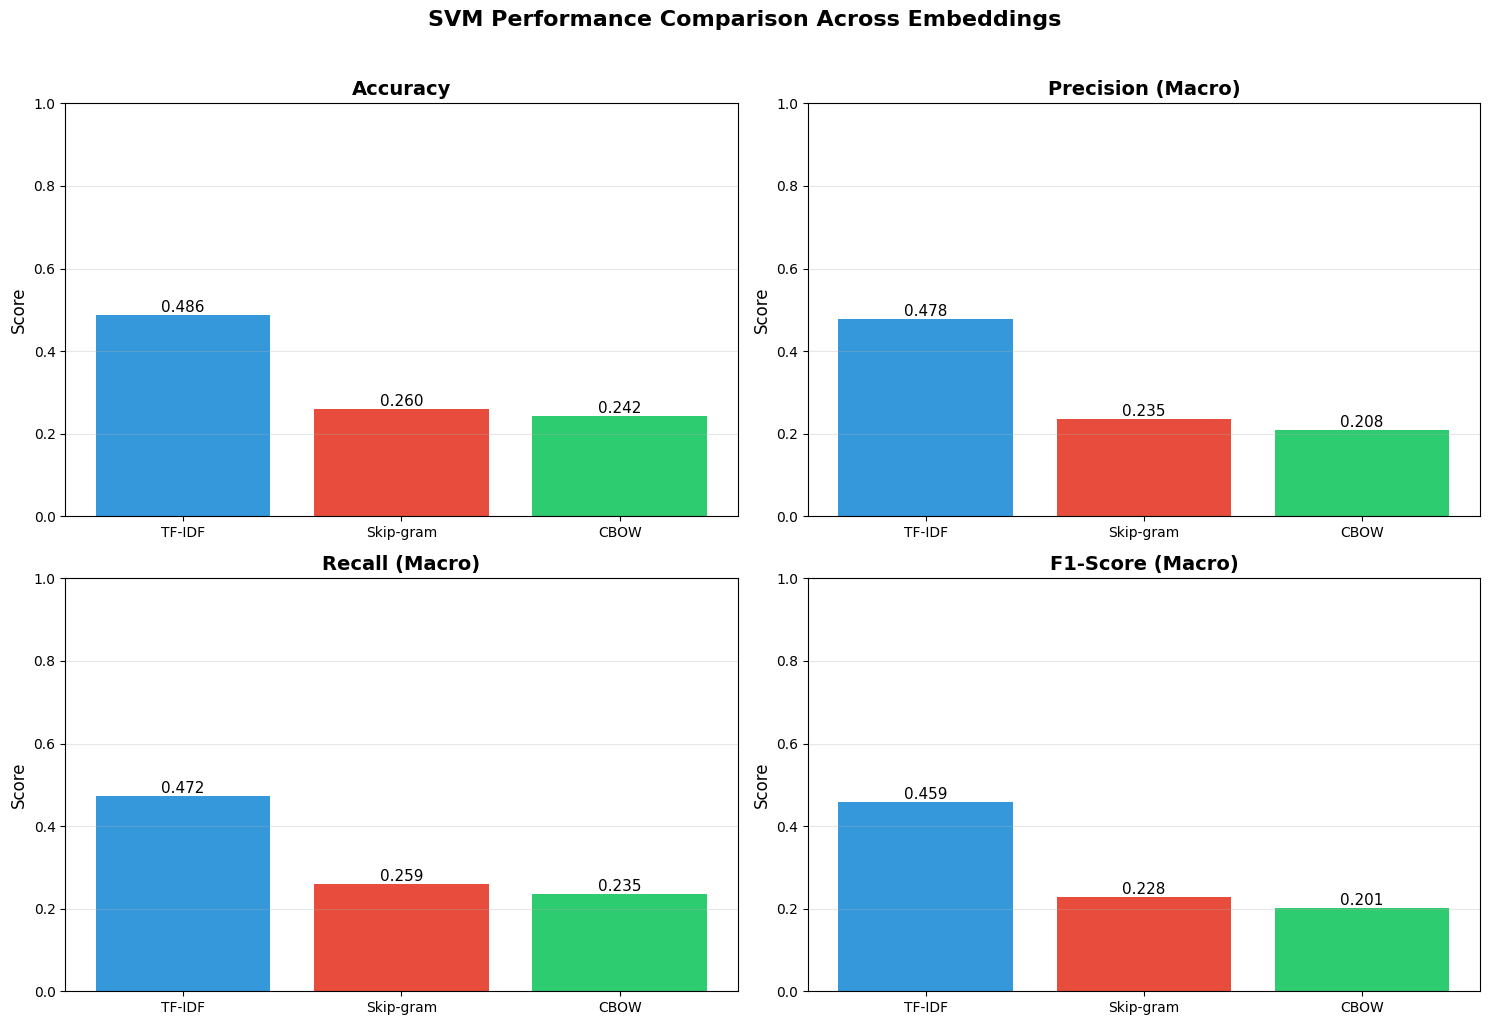

In [16]:
# Plot comparison of metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

metrics_to_plot = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
titles = ['Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1-Score (Macro)']

for idx, (metric, title) in enumerate(zip(metrics_to_plot, titles)):
    ax = axes[idx // 2, idx % 2]
    values = [results[emb][metric] for emb in ['TF-IDF', 'Skip-gram', 'CBOW']]
    bars = ax.bar(['TF-IDF', 'Skip-gram', 'CBOW'], values, color=['#3498db', '#e74c3c', '#2ecc71'])
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_ylabel('Score', fontsize=12)
    ax.set_ylim([0, 1])
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=11)
    
    ax.grid(axis='y', alpha=0.3)

plt.suptitle('SVM Performance Comparison Across Embeddings', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

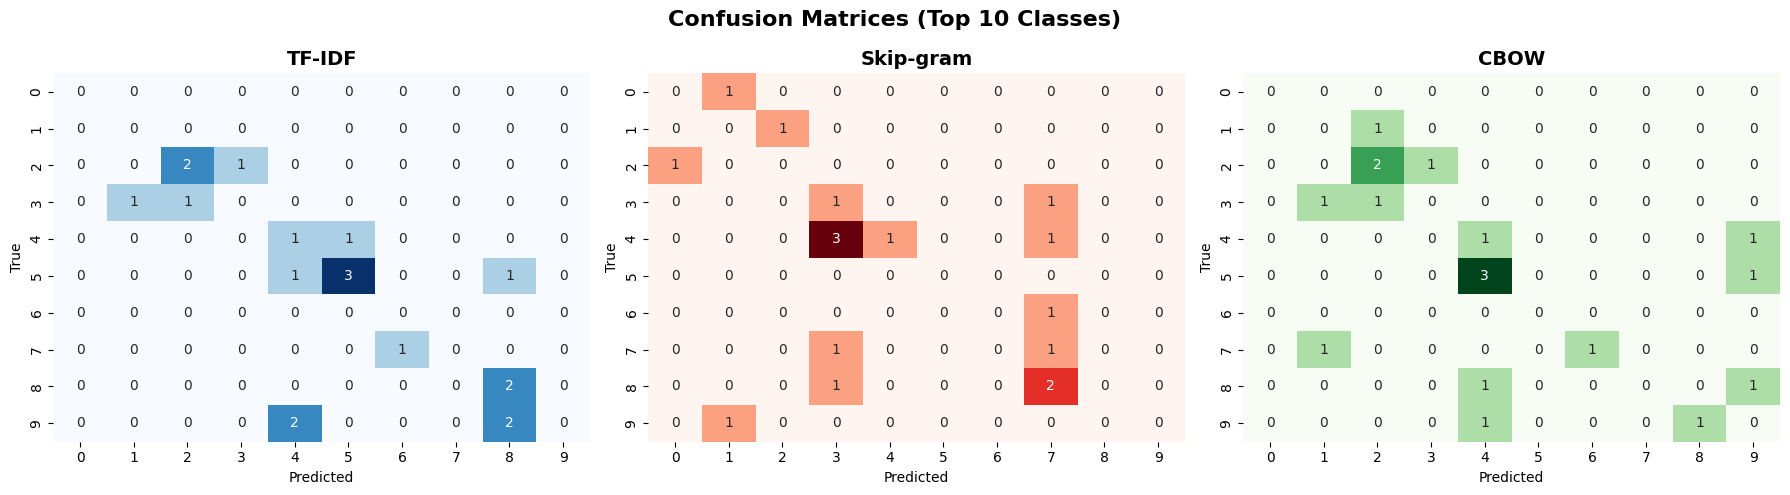

In [17]:
# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Get unique labels for confusion matrix
unique_labels = sorted(np.unique(y_test))

# TF-IDF confusion matrix
cm_tfidf = confusion_matrix(y_test, y_test_pred_tfidf)
sns.heatmap(cm_tfidf[:10, :10], annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar=False)
axes[0].set_title('TF-IDF', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# Skip-gram confusion matrix
cm_skipgram = confusion_matrix(y_test, y_test_pred_skipgram)
sns.heatmap(cm_skipgram[:10, :10], annot=True, fmt='d', cmap='Reds', ax=axes[1], cbar=False)
axes[1].set_title('Skip-gram', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

# CBOW confusion matrix
cm_cbow = confusion_matrix(y_test, y_test_pred_cbow)
sns.heatmap(cm_cbow[:10, :10], annot=True, fmt='d', cmap='Greens', ax=axes[2], cbar=False)
axes[2].set_title('CBOW', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

plt.suptitle('Confusion Matrices (Top 10 Classes)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 10. Detailed Classification Reports

In [19]:
print("TF-IDF - Classification Report")

# Use union of labels so target_names length matches (predictions can include classes not in y_test)
labels_tfidf = sorted(set(y_test) | set(y_test_pred_tfidf))
target_names_tfidf = [f'Class_{i}' for i in labels_tfidf]
print(classification_report(y_test, y_test_pred_tfidf, labels=labels_tfidf, target_names=target_names_tfidf, zero_division=0))

TF-IDF - Classification Report
              precision    recall  f1-score   support

     Class_0       0.00      0.00      0.00         0
     Class_8       0.00      0.00      0.00         1
     Class_9       0.33      0.67      0.44         3
    Class_10       0.00      0.00      0.00         2
    Class_11       0.25      0.50      0.33         2
    Class_12       0.50      0.60      0.55         5
    Class_13       0.00      0.00      0.00         0
    Class_14       0.00      0.00      0.00         2
    Class_15       0.33      1.00      0.50         2
    Class_16       0.00      0.00      0.00         4
    Class_17       0.00      0.00      0.00         2
    Class_18       0.50      1.00      0.67         1
    Class_19       0.00      0.00      0.00         1
    Class_20       0.00      0.00      0.00         1
    Class_21       1.00      1.00      1.00         1
    Class_22       0.00      0.00      0.00         1
    Class_23       0.00      0.00      0.00       

In [20]:
print("Skip-gram - Classification Report")

labels_sg = sorted(set(y_test) | set(y_test_pred_skipgram))
target_names_sg = [f'Class_{i}' for i in labels_sg]
print(classification_report(y_test, y_test_pred_skipgram, labels=labels_sg, target_names=target_names_sg, zero_division=0))

Skip-gram - Classification Report
              precision    recall  f1-score   support

     Class_8       0.00      0.00      0.00         1
     Class_9       0.00      0.00      0.00         3
    Class_10       0.00      0.00      0.00         2
    Class_11       0.14      0.50      0.22         2
    Class_12       1.00      0.20      0.33         5
    Class_13       0.00      0.00      0.00         0
    Class_14       0.00      0.00      0.00         2
    Class_15       0.17      0.50      0.25         2
    Class_16       0.00      0.00      0.00         4
    Class_17       0.00      0.00      0.00         2
    Class_18       0.33      1.00      0.50         1
    Class_19       1.00      1.00      1.00         1
    Class_20       0.50      1.00      0.67         1
    Class_21       0.00      0.00      0.00         1
    Class_22       0.00      0.00      0.00         1
    Class_23       0.00      0.00      0.00         3
    Class_24       0.00      0.00      0.00    

In [21]:
print("CBOW - Classification Report")

labels_cbow = sorted(set(y_test) | set(y_test_pred_cbow))
target_names_cbow = [f'Class_{i}' for i in labels_cbow]
print(classification_report(y_test, y_test_pred_cbow, labels=labels_cbow, target_names=target_names_cbow, zero_division=0))

CBOW - Classification Report
              precision    recall  f1-score   support

     Class_0       0.00      0.00      0.00         0
     Class_8       0.00      0.00      0.00         1
     Class_9       0.33      0.67      0.44         3
    Class_10       0.00      0.00      0.00         2
    Class_11       0.11      0.50      0.18         2
    Class_12       0.00      0.00      0.00         5
    Class_13       0.00      0.00      0.00         0
    Class_14       0.00      0.00      0.00         2
    Class_15       0.00      0.00      0.00         2
    Class_16       0.00      0.00      0.00         4
    Class_17       0.00      0.00      0.00         2
    Class_18       0.17      1.00      0.29         1
    Class_19       0.00      0.00      0.00         1
    Class_20       0.50      1.00      0.67         1
    Class_21       0.00      0.00      0.00         1
    Class_22       0.00      0.00      0.00         1
    Class_23       0.00      0.00      0.00         

## 11. Summary and Conclusions

### Key Findings:
1. **Baseline Performance**: [Compare baseline vs tuned models]
2. **Best Performing Embedding**: [Compare results from the comparison table]
3. **Hyperparameters**: Each embedding may benefit from different SVM hyperparameters
   - **C (Regularization)**: Controls margin vs classification error trade-off
   - **Kernel**: Linear is fast, RBF captures non-linear patterns, Poly adds complexity
   - **Gamma**: Controls influence of individual training examples
   - **Class Weight**: Helps with imbalanced datasets
4. **Training Time**: TF-IDF is typically fastest, while Word2Vec methods take longer
5. **Feature Dimensions**: TF-IDF creates sparse high-dimensional features, while Word2Vec creates dense lower-dimensional features

### SVM Parameters Explained:
- **C**: Regularization parameter. Smaller C = larger margin, more misclassifications allowed. Larger C = smaller margin, fewer misclassifications.
- **kernel**: Type of kernel function. 'linear' = linear decision boundary, 'rbf' = non-linear with radial basis, 'poly' = polynomial decision boundary.
- **gamma**: Kernel coefficient. 'scale' = 1/(n_features * X.var()), 'auto' = 1/n_features. Controls how far influence of single training example reaches.
- **degree**: Degree of polynomial kernel (only for 'poly' kernel).
- **coef0**: Independent term in kernel function (only for 'poly' and 'sigmoid' kernels).
- **class_weight**: 'balanced' adjusts weights inversely proportional to class frequencies.

### For Team Members:
The embeddings have been saved in `embeddings/saved/` and can be loaded using:
```python
from embeddings.tfidf_embedding import TFIDFEmbedding
from embeddings.skipgram_embedding import SkipGramEmbedding
from embeddings.cbow_embedding import CBOWEmbedding

# Load saved embeddings
tfidf = TFIDFEmbedding()
tfidf.load('embeddings/saved/tfidf_model.pkl')

skipgram = SkipGramEmbedding()
skipgram.load('embeddings/saved/skipgram_model.bin')

cbow = CBOWEmbedding()
cbow.load('embeddings/saved/cbow_model.bin')
```